# Implementasi metode fuzzy mamdani dalam tingkat kebisingan lalu lintas
Rizky Marliansyah (09011381722112)

# Metode fuzzy yang digunakan





Metode fuzzy yang digunakan adalah Mamdani. Langkah-langkah dalam metode mamdani, antara lain: 

1.Pembentukan Himpunan Fuzzy

2.Aplikasi Fungsi Implikasi

3.Komposisi Aturan

4.Defuzifikasi


In [70]:
import numpy as np 
import skfuzzy as fuzz 
from skfuzzy import control as ctrl 
import matplotlib.pyplot as plt 

# Fuzzifikasi

Pendefinisian Input dan Output pada Proses Tingkat Kebisingan

Input : 

1.Lebarjalan

2.Jumlahkendaraan

Output : 

1.Tingkatkebisingan

# Input Lebarjalan

\begin{equation}
  Lebarjalan['sempit'] = \mu sempit(x)=\begin{cases}
    1, & \text{$0\leq x\leq3$}.\\
    (7.5 - x)/(7.5 - 3) , & \text{$3 \leq x \leq 7.5$}.\\
    0, & \text{$x\geq 7.5 $ }.
  \end{cases}
  \\
  Lebarjalan['sedang'] = \mu sedang(x)=\begin{cases}
    0, & \text{$x\leq 3$ }.  \\
    (x - 3)/(7.5 - 3) , & \text{$3 \leq x \leq 7.5$}.\\
    (12 - x)/(12 - 7.5) , & \text{$7.5 \leq x \leq 12$}.\\
  \end{cases}
  \\
  Lebarjalan['lebar'] = \mu lebar(x)=\begin{cases}
    0, & \text{$ x\leq7.5$}.\\
    (x - 7.5)/(12 - 7.5) , & \text{$7.5 \leq x \leq 12$}.\\
    1, & \text{$x\geq 12 $ }.
  \end{cases}
\end{equation} 

# Input Jumlahkendaraan

\begin{equation}
  Jumlahkendaraan['sedikit'] = \mu sedikit(x)=\begin{cases}
    1, & \text{$0\leq x\leq2$}.\\
    (20 - x)/(20 - 2) , & \text{$2 \leq x \leq 20$}.\\
    0, & \text{$x\geq 20 $ }.
  \end{cases}
  \\
  Jumlahkendaraan['sedang'] = \mu sedang(x)=\begin{cases}
    0, & \text{$x\leq 0$ atau $x\geq20$}.  \\
    (x - 20)/(30 - 20) , & \text{$20 \leq x \leq 30$}.\\
    (40 - x)/(30 - 20) , & \text{$30 \leq x \leq 40$}.\\
  \end{cases}
  \\
  Jumlahkendaraan['banyak'] = \mu banyak(x)=\begin{cases}
    0, & \text{$ x\leq40$}.\\
    (x - 40)/(60 - 40) , & \text{$40 \leq x \leq 60$}.\\
    1, & \text{$x\geq 40 $ }.
  \end{cases}
\end{equation}  

# Output Tingkatkebisingan

\begin{equation}
  Tingkatkebisingan['Rendah'] = \mu Rendah(x)=\begin{cases}
    1, & \text{$0\leq x\leq60$}.\\
    (80 - x)/(80 - 60) , & \text{$60 \leq x \leq 80$}.\\
    0, & \text{$x\geq 80 $ }.
  \end{cases}
  \\
  Tingkatkebisingan['Sedang'] = \mu Sedang(x)=\begin{cases}
    0, & \text{$x\leq 60$ atau $x\geq75$}.  \\
    (x - 60)/(80 - 60) , & \text{$60 \leq x \leq 80$}.\\
    (100 - x)/(80 - 60) , & \text{$80 \leq x \leq 100$}.\\
  \end{cases}
  \\
  Tingkatkebisingan['Tinggi'] = \mu Tinggi(x)=\begin{cases}
    0, & \text{$ x\leq80$}.\\
    (x - 80)/(80 - 60) , & \text{$80 \leq x \leq 100$}.\\
    1, & \text{$x\geq 100 $ }.
  \end{cases}
\end{equation} 

In [71]:
Lebarjalan = ctrl.Antecedent(np.arange(3,12,0.5),'Lebarjalan')
Jumlahkendaraan = ctrl.Antecedent(np.arange(2,60,1),'Jumlahkendaraan')
Lebarjalan_x = np.arange(3,12,0.5)
Jumlahkendaraan_x = np.arange(2,60,1)

Tingkatkebisingan = ctrl.Consequent(np.arange(60,100,1),'Tingkatkebisingan')

# Pembentukan himpunan Fuzzy
Pada proses memprediksi tingkat kebisingan lalu lintas, ada beberapa variabel yang terdiri dari variabel lebar jalan, jumlah kendaraan, dan tingkat kebisingan. Selanjutnya akan dibentuk himpunan fuzzy
dari variabel – variabel tersebut. Adapun himpunan fuzzy yang terbentuk dapat dilihat berikut ini

In [72]:
Lebarjalan['sempit']=fuzz.trimf(Lebarjalan.universe, [3,3,7.5])
Lebarjalan['sedang']=fuzz.trimf(Lebarjalan.universe, [3,7.5,12])
Lebarjalan['lebar']=fuzz.trimf(Lebarjalan.universe, [7.5,12,12])

Jumlahkendaraan['sedikit']=fuzz.trimf(Jumlahkendaraan.universe, [1,1,20])
Jumlahkendaraan['sedang']=fuzz.trimf(Jumlahkendaraan.universe, [20,30,40,])
Jumlahkendaraan['banyak']=fuzz.trimf(Jumlahkendaraan.universe, [40,60,60,])

Tingkatkebisingan['Rendah']=fuzz.trimf(Tingkatkebisingan.universe, [0,60,80])
Tingkatkebisingan['Sedang']=fuzz.trimf(Tingkatkebisingan.universe, [60,80,100])
Tingkatkebisingan['Tinggi']=fuzz.trimf(Tingkatkebisingan.universe, [80,100,100])

# Membership function

-Membership function yang digunakan yaitu fungsi segitiga atau triangular (trimf).

Menampilkan plotting Lebarjalan
\begin{equation}
  Lebarjalan['sempit'] = \mu sempit(x)=\begin{cases}
    1, & \text{$0\leq x\leq3$}.\\
    (7.5 - x)/(7.5 - 3) , & \text{$3 \leq x \leq 7.5$}.\\
    0, & \text{$x\geq 7.5 $ }.
  \end{cases}
  \\
  Lebarjalan['sedang'] = \mu sedang(x)=\begin{cases}
    0, & \text{$x\leq 3$ }.  \\
    (x - 3)/(7.5 - 3) , & \text{$3 \leq x \leq 7.5$}.\\
    (12 - x)/(12 - 7.5) , & \text{$7.5 \leq x \leq 12$}.\\
  \end{cases}
  \\
  Lebarjalan['lebar'] = \mu lebar(x)=\begin{cases}
    0, & \text{$ x\leq7.5$}.\\
    (x - 7.5)/(12 - 7.5) , & \text{$7.5 \leq x \leq 12$}.\\
    1, & \text{$x\geq 12 $ }.
  \end{cases}
\end{equation} 

C:\Users\Windows 10\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


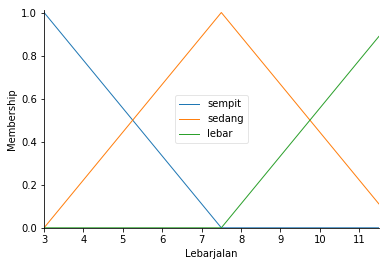

In [73]:
Lebarjalan.view()

Text(0.5,1,'Lebarjalan Sempit')

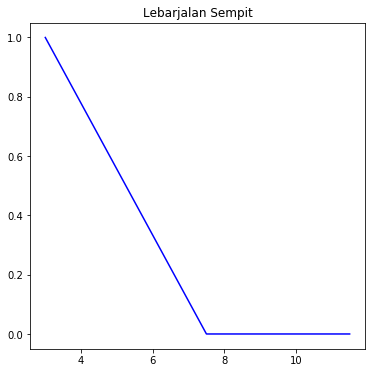

In [74]:
Lebarjalan_sempit = fuzz.trimf(Lebarjalan_x,[3,3,7.5])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(Lebarjalan_x,Lebarjalan_sempit,'blue')
ax0.set_title('Lebarjalan Sempit')

Text(0.5,1,'Lebarjalan Sedang')

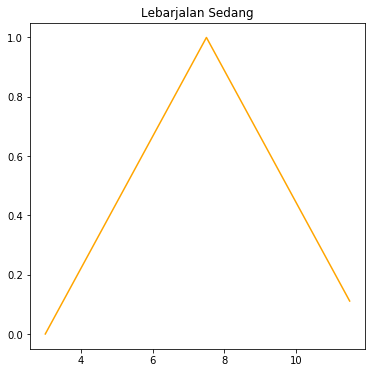

In [75]:
Lebarjalan_sedang = fuzz.trimf(Lebarjalan_x,[3,7.5,12])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(Lebarjalan_x,Lebarjalan_sedang,'orange')
ax0.set_title('Lebarjalan Sedang')

Text(0.5,1,'Lebarjalan lebar')

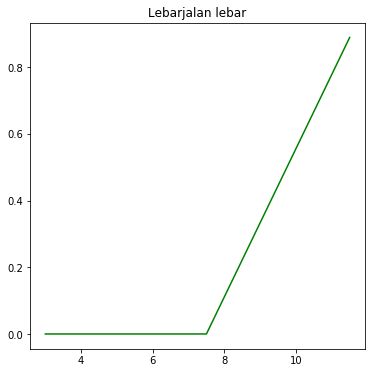

In [76]:
Lebarjalan_lebar = fuzz.trimf(Lebarjalan_x,[7.5,12,12])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(Lebarjalan_x,Lebarjalan_lebar,'green')
ax0.set_title('Lebarjalan lebar')

Menampilkan plotting Jumlahkendaraan
\begin{equation}
  Jumlahkendaraan['sedikit'] = \mu sedikit(x)=\begin{cases}
    1, & \text{$0\leq x\leq2$}.\\
    (20 - x)/(20 - 2) , & \text{$2 \leq x \leq 20$}.\\
    0, & \text{$x\geq 20 $ }.
  \end{cases}
  \\
  Jumlahkendaraan['sedang'] = \mu sedang(x)=\begin{cases}
    0, & \text{$x\leq 0$ atau $x\geq20$}.  \\
    (x - 20)/(30 - 20) , & \text{$20 \leq x \leq 30$}.\\
    (40 - x)/(30 - 20) , & \text{$30 \leq x \leq 40$}.\\
  \end{cases}
  \\
  Jumlahkendaraan['banyak'] = \mu banyak(x)=\begin{cases}
    0, & \text{$ x\leq40$}.\\
    (x - 40)/(60 - 40) , & \text{$40 \leq x \leq 60$}.\\
    1, & \text{$x\geq 40 $ }.
  \end{cases}
\end{equation}  

C:\Users\Windows 10\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


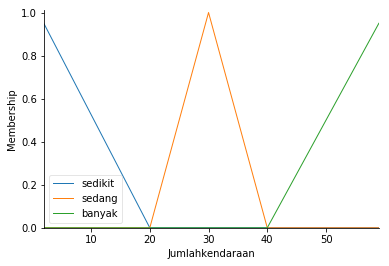

In [77]:
Jumlahkendaraan.view()

Text(0.5,1,'Jumlahkendaraan Sedikit')

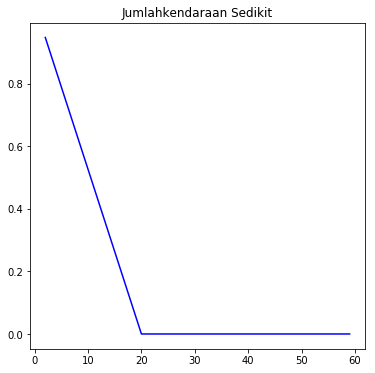

In [78]:
Jumlahkendaraan_sedikit = fuzz.trimf(Jumlahkendaraan_x,[1,1,20])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(Jumlahkendaraan_x,Jumlahkendaraan_sedikit,'blue')
ax0.set_title('Jumlahkendaraan Sedikit')

Text(0.5,1,'Jumlahkendaraan Sedang')

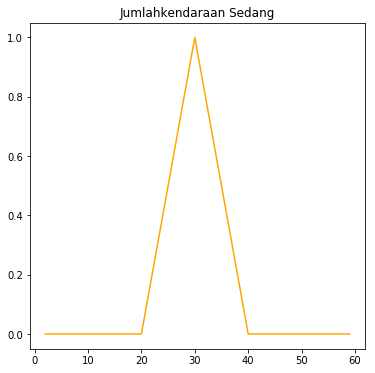

In [79]:
Jumlahkendaraan_sedang = fuzz.trimf(Jumlahkendaraan_x,[20,30,40])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(Jumlahkendaraan_x,Jumlahkendaraan_sedang,'orange')
ax0.set_title('Jumlahkendaraan Sedang')

Text(0.5,1,'Jumlahkendaraan Banyak')

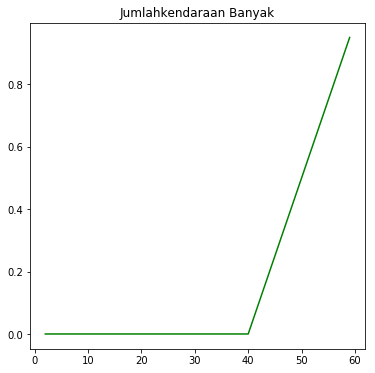

In [80]:
Jumlahkendaraan_banyak = fuzz.trimf(Jumlahkendaraan_x,[40,60,60])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(Jumlahkendaraan_x,Jumlahkendaraan_banyak,'green')
ax0.set_title('Jumlahkendaraan Banyak')

# Grafik variabel output : Tingkat kebisingan

Fuzzy output pada sistem ini menggunakan fungsi keanggotaan berbentuk segitiga dan dibagi menjadi 3 himpunan keanggotaan, yaitu :

1.Rendah

2.Sedang

3.Tinggi

Membership functionnya berupa tingkat kebisingan suara lalu lintas dari range 0-100
Dimana range tingkat kebisingan rendah adalah 0-60,lalu range sedang berupa 60-80,sedangkan tingkat kebisingan tinggi memiliki range 80-100
\begin{equation}
  Tingkatkebisingan['Rendah'] = \mu Rendah(x)=\begin{cases}
    1, & \text{$0\leq x\leq60$}.\\
    (80 - x)/(80 - 60) , & \text{$60 \leq x \leq 80$}.\\
    0, & \text{$x\geq 80 $ }.
  \end{cases}
  \\
  Tingkatkebisingan['Sedang'] = \mu Sedang(x)=\begin{cases}
    0, & \text{$x\leq 60$ atau $x\geq75$}.  \\
    (x - 60)/(80 - 60) , & \text{$60 \leq x \leq 80$}.\\
    (100 - x)/(80 - 60) , & \text{$80 \leq x \leq 100$}.\\
  \end{cases}
  \\
  Tingkatkebisingan['Tinggi'] = \mu Tinggi(x)=\begin{cases}
    0, & \text{$ x\leq80$}.\\
    (x - 80)/(80 - 60) , & \text{$80 \leq x \leq 100$}.\\
    1, & \text{$x\geq 100 $ }.
  \end{cases}
\end{equation} 

C:\Users\Windows 10\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


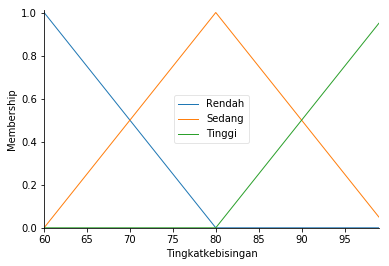

In [81]:
Tingkatkebisingan.view()

Grafik diatas adalah hasil dari penjelasan kodingan tadi yang menampilkan hasil dari 3 himpunan output tersebut

# Inferencing

Sistem Inferensi Fuzzy merupakan suatu kerangka komputasi yang didasarkan pada teori himpunan fuzzy, aturan fuzzy berbentuk IF-THEN dan penalaran fuzzy secara garis besar.
Adapun aturan yang diperoleh dari kombinasi variabel lebar jalan dan jumlah kendaraan untuk memprediksi tingkat kebisingan lalu lintas di jalan raya adalah sebanyak 9 aturan,yaitu :

|Rule|Lebarjalan|Jumlahkendaraan|Tingkatkebisingan|
|----|------------|---------|-----|
|Rule1|sempit|sedikit|Rendah|
|Rule2|sempit|banyak|Tinggi|
|Rule3|sedang|sedikit|Rendah|
|Rule4|sempit|sedang|Sedang|
|Rule5|sedang|banyak|Tinggi|
|Rule6|lebar|sedikit|Rendah|
|Rule7|lebar|banyak|Tinggi|
|Rule8|sedang|sedang|Sedang|
|Rule9|lebar|sedang|Sedang|

In [82]:
rule1 = ctrl.Rule(Lebarjalan['sempit']&Jumlahkendaraan['sedikit'], Tingkatkebisingan['Rendah'])
rule2 = ctrl.Rule(Lebarjalan['sempit']&Jumlahkendaraan['banyak'], Tingkatkebisingan['Tinggi'])
rule3 = ctrl.Rule(Lebarjalan['sedang']&Jumlahkendaraan['sedikit'], Tingkatkebisingan['Rendah'])
rule4 = ctrl.Rule(Lebarjalan['sempit']&Jumlahkendaraan['sedang'], Tingkatkebisingan['Sedang'])
rule5 = ctrl.Rule(Lebarjalan['sedang']&Jumlahkendaraan['banyak'], Tingkatkebisingan['Tinggi'])
rule6 = ctrl.Rule(Lebarjalan['lebar']&Jumlahkendaraan['sedikit'], Tingkatkebisingan['Rendah'])
rule7 = ctrl.Rule(Lebarjalan['lebar']&Jumlahkendaraan['banyak'], Tingkatkebisingan['Tinggi'])
rule8 = ctrl.Rule(Lebarjalan['sedang']&Jumlahkendaraan['sedang'], Tingkatkebisingan['Sedang'])
rule9 = ctrl.Rule(Lebarjalan['lebar']&Jumlahkendaraan['sedang'], Tingkatkebisingan['Sedang'])

1. IF (Lebarjalan sempit) AND (Jumlahkendaraan sedikit), THEN (Tingkat kebisingan Rendah)
2. IF (Lebarjalan sempit) AND (Jumlahkendaraan banyak), THEN (Tingkat kebisingan Tinggi)
3. IF (Lebarjalan sedang) AND (Jumlahkendaraan sedikit), THEN (Tingkat kebisingan Rendah)
4. IF (Lebarjalan sempit) AND (Jumlahkendaraan sedang), THEN (Tingkat kebisingan Sedang)
5. IF (Lebarjalan sedang) AND (Jumlahkendaraan banyak), THEN (Tingkat kebisingan Tinggi)
6. IF (Lebarjalan lebar) AND (Jumlahkendaraan sedikit), THEN (Tingkat kebisingan Rendah)
7. IF (Lebarjalan lebar) AND (Jumlahkendaraan banyak), THEN (Tingkat kebisingan Tinggi)
8. IF (Lebarjalan sedang) AND (Jumlahkendaraan sedang), THEN (Tingkat kebisingan Sedang)
9. IF (Lebarjalan lebar) AND (Jumlahkendaraan sedang), THEN (Tingkat kebisingan Sedang)


# Rule evaluation 

In [83]:
Tingkatkebisingan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

# Defuzzifikasi

Tahap defuzzifikasi adalah tahap perhitungan crisp output. Input dari tahap ini adalah himpunan fuzzy yang diperoleh dari komposisi aturan-aturan fuzzy, sedangkan outputnya adalah suatu bilangan pada domain himpunan fuzzy tersebut.
Berikut simulasi dengan memasukkan input Lebarjalan dan Jumlahkendaraan 

In [84]:
braking = ctrl.ControlSystemSimulation(Tingkatkebisingan_ctrl)

braking.input['Lebarjalan']=12
braking.input['Jumlahkendaraan']=5

braking.compute()

C:\Users\Windows 10\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


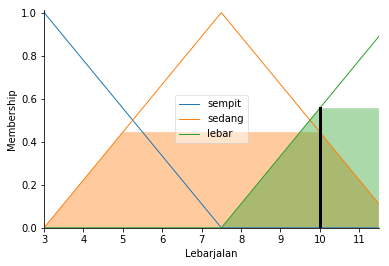

In [86]:
Lebarjalan.view(sim=braking)

Plotting fungsi keanggotaan Lebarjalan setelah diinput nilai 

C:\Users\Windows 10\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


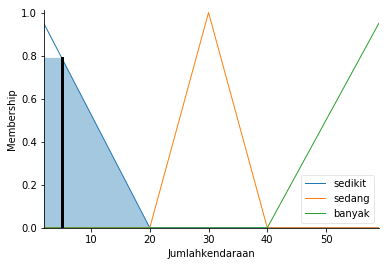

In [87]:
Jumlahkendaraan.view(sim=braking)

Plotting fungsi Jumlahkendaraan setelah diinput nilai

67.57834757834758


C:\Users\Windows 10\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


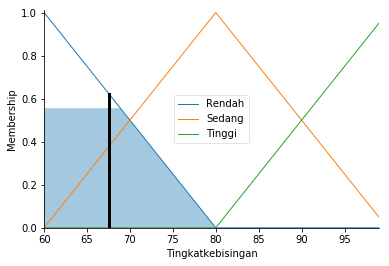

In [88]:
print(braking.output['Tingkatkebisingan'])

Tingkatkebisingan.view(sim=braking)

Plotting fungsi keanggotaan Tingkatkebisingan setelah didapatkan perhitungan defuzzifikasi output

# Penghitungan manual

# Input LebarJalan

\begin{equation}
  Lebarjalan = 10 \\
  Lebarjalan['sempit'] = \mu sempit(x)=\begin{cases}
    1, & \text{$0\leq x\leq3$}.\\
    (7.5 - x)/(7.5 - 3) , & \text{$3 \leq x \leq 7.5$}.\\
    0, & \text{$x\geq 7.5 $ } \checkmark\\
  \end{cases}
  \\
  Lebarjalan['sedang'] = \mu sedang(x)=\begin{cases}
    0, & \text{$x\leq 3$ }.\\
    (x - 3)/(7.5 - 3) , & \text{$3 \leq x \leq 7.5$}.\\
    (12 - x)/(12 - 7.5) , & \text{$7.5 \leq x \leq 12$} \checkmark\\
  \end{cases}
  \\
  Lebarjalan['lebar'] = \mu lebar(x)=\begin{cases}
    0, & \text{$ x\leq7.5$}.\\
    (x - 7.5)/(12 - 7.5) , & \text{$7.5 \leq x \leq 12$} \checkmark\\
    1, & \text{$x\geq 12 $ }.
  \end{cases}
\end{equation} 

\begin{equation}
    \mu Sedang(10) = (12 - 10) / (12 - 7.5) \\
    \mu Sedang(10) = 2/4.5 \\ 
    \mu Sedang(10) = 0.44 \\
    \mu Lebar(10) = (10 - 7.5) / (12-7.5) \\
    \mu Lebar(10) = 2.5/4.5 \\
    \mu Lebar(10) = 0.55 \\
\end{equation}

# ===============================================================​

# Input Jumlahkendaraan

\begin{equation}
  Jumlahkendaraan=5 \\
  Jumlahkendaraan['sedikit'] = \mu sedikit(x)=\begin{cases}
    1, & \text{$0\leq x\leq2$}.\\
    (20 - x)/(20 - 2) , & \text{$2 \leq x \leq 20$} \checkmark\\
    0, & \text{$x\geq 20 $ }.
  \end{cases}
  \\
  Jumlahkendaraan['sedang'] = \mu sedang(x)=\begin{cases}
    0, & \text{$x\leq 0$ atau $x\geq20$}.  \\
    (x - 20)/(30 - 20) , & \text{$20 \leq x \leq 30$}.\\
    (40 - x)/(30 - 20) , & \text{$30 \leq x \leq 40$}.\\
  \end{cases}
  \\
  Jumlahkendaraan['banyak'] = \mu banyak(x)=\begin{cases}
    0, & \text{$ x\leq40$}.\\
    (x - 40)/(60 - 40) , & \text{$40 \leq x \leq 60$}.\\
    1, & \text{$x\geq 40 $ }.
  \end{cases}
\end{equation}  

\begin{equation}
    \mu sedikit(5) = (20 - 5) / (20 - 2) \\
    \mu sedikit(5) = 15/18 \\ 
    \mu sedikit(5) = 0.83 \\
\end{equation}

[R1] IF Lebarjalan sempit AND Jumlahkendaraan sedikit THEN Tingkatkebisingan is Rendah
- = ( µLebarjalan sempit & µJumlahkendaraan sedikit)
  = ( 0 & 0.83 )
  = 0
Maka nilai $$ Z_1 = 0 $$


[R2] IF Lebarjalan sempit AND Jumlahkendaraan banyak THEN Tingkatkebisingan is Tinggi
- = ( µLebarjalan sempit & µJumlahkendaraan banyak)
  = ( 0 & 0 )
  = 0
Maka nilai $$ Z_2 = 0 $$


[R3] IF Lebarjalan sedang AND Jumlahkendaraan sedikit THEN Tingkatkebisingan is Rendah
- = ( µLebarjalan sempit & µJumlahkendaraan sedikit)
  = ( 0.44 & 0.83 )
  Disini terdapat 2 nilai keanggotaan maka akan kita uji satu persatu
 $$ (80-x) / (20) = 0.44 $$
 $$ (80-x) = 8.8 $$
 $$ - x = -71.2 $$
 $$ x = 71.2 $$
 
 $$ (80-x) / (20) = 0.83 $$
 $$ (80-x) = 16.6 $$
 $$ - x = -63.4 $$
 $$ x = 63.4 $$
Akan diambil nilai terkecil
Maka nilai $$ Z_3 = 63.4 $$

[R4] IF Lebarjalan sempit AND Jumlahkendaraan sedang THEN Tingkatkebisingan is Sedang
- = ( µLebarjalan sempit & µJumlahkendaraan sedang)
  = ( 0 & 0 )
  = 0
Maka nilai $$ Z_4 = 0 $$

[R5] IF Lebarjalan sedang AND Jumlahkendaraan banyak THEN Tingkatkebisingan is Tinggi
- = ( µLebarjalan sedang & µJumlahkendaraan banyak)
  = ( 0.44 & 0 )
  = 0
Maka nilai $$ Z_5 = 0 $$

[R6] IF Lebarjalan lebar AND Jumlahkendaraan sedikit THEN Tingkatkebisingan is Rendah
- = ( µLebarjalan lebar & µJumlahkendaraan sedikit)
  = ( 0.55 & 0.83 )
  Disini terdapat 2 nilai keanggotaan maka akan kita uji satu persatu
 $$ (80-x) / (20) = 0.55 $$
 $$ (80-x) = 11 $$
 $$ - x = -69 $$
 $$ x = 69 $$
 
 $$ (80-x) / (20) = 0.83 $$
 $$ (80-x) = 16.6 $$
 $$ - x = -63.4 $$
 $$ x = 63.4 $$
Akan diambil nilai terkecil
Maka nilai $$ Z_6 = 63.4 $$

[R7] IF Lebarjalan lebar AND Jumlahkendaraan banyak THEN Tingkatkebisingan is Tinggi
- = ( µLebarjalan lebar & µJumlahkendaraan banyak)
  = ( 0.55 & 0 )
  = 0
Maka nilai $$ Z_7 = 0 $$

[R8] IF Lebarjalan sedang AND Jumlahkendaraan sedang THEN Tingkatkebisingan is Sedang
- = ( µLebarjalan sedang & µJumlahkendaraan sedang)
  = ( 0.44 & 0 )
  = 0
Maka nilai $$ Z_8 = 0 $$

[R9] IF Lebarjalan lebar AND Jumlahkendaraan sedang THEN Tingkatkebisingan is Sedang
- = ( µLebarjalan lebar & µJumlahkendaraan sedang)
  = ( 0.55 & 0 )
  = 0
Maka nilai $$ Z_9 = 0 $$

Setelah itu kita dapat mencari nilai Z secara keseluruhan yaitu :
Z =$$ \frac{\alpha predikat_1 \times Z_1 +
\alpha predikat_2 \times Z_2 +
\alpha predikat_3 \times Z_3 +
\alpha predikat_4 \times Z_4 +
\alpha predikat_5 \times Z_5 +
\alpha predikat_6 \times Z_6 +
\alpha predikat_7 \times Z_7 +
\alpha predikat_8 \times Z_8 +
\alpha predikat_9 \times Z_9 }
{\alpha predikat_1 + \alpha predikat_2 +
\alpha predikat_3 + \alpha predikat_4 +
\alpha predikat_5 + \alpha predikat_6 +
\alpha predikat_7 + \alpha predikat_8 +
\alpha predikat_9}$$

 $$Z = \frac{0 + 0 + 0,44 \times 63.4 + 0 + 0 + 0.55 \times 63,4 + 0 + 0 + 0}{0 + 0 + 0.44 + 0 + 0 + 0,55 + 0 + 0 + 0 } $$
 
 $$ Z = \frac{27.896 + 34.87}{0.99} $$
 $$ Z = 63.4 \ $$

# Dari penelitian mengenai prediksi tingkat kebisingan lalu lintas dapat diambil kesimpulan sebagai berikut :
Metode fuzzy mamdani berhasil diimplementasikan dalam memprediksi tingkat kebisingan lalu lintas.Dari hasil output diatas maka didapat nilai dari program sebesari 67.57, sedangkan perhitungan manual nya mendapat nilai 63.4 dan terdapat error perbandingan dari nilai tersebut adalah 6.1% .
Maka tingkat kebisingan dari penelitian tersebut termasuk dalam kategori Rendah

# Referensi

https://ojs.amikom.ac.id/index.php/semnasteknomedia/article/view/744